# UNESCO Heritage Sites (2021)

## Visualization of all UNESCO World Heritage Sites

Date: 28/12/2021

## Dataset from [Kaggle](https://www.kaggle.com/ramjasmaurya/unesco-heritage-sites2021)

### Included in the dataset:
* Description
* Inscription date
* Danger
* Delisting date
* Latitude
* Longitude
* Area (hectares)
* Category
* Country
* Region
* ISO code
* Transboundary
* Rev_bis

## Imports

In [110]:
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd

import folium 
from folium.plugins import HeatMap

import plotly.graph_objects as go
import plotly.express as px

## Data prep

In [14]:
data = pd.read_csv("sites_2021.csv")
data.head()

,Name,short_description,date_inscribed,danger,date_end,longitude,latitude,area_hectares,category_long,category_short,Country name,Region,iso_code,transboundary,rev_bis
0,L’Anse aux Meadows National Historic Site,<p>At the tip of the Great Northern Peninsula ...,1978,0,NaN,-55.616667,51.466667,7991.00,Cultural,C,Canada,Europe and North America,ca,0,NaN
1,Nahanni National Park,"<p>Located along the South Nahanni River, one ...",1978,0,NaN,-125.589444,61.547222,476560.00,Natural,N,Canada,Europe and North America,ca,0,NaN
2,Galápagos Islands,"<p>Situated in the Pacific Ocean some 1,000 km...",1978,0,2010.0,-90.501319,-0.689860,14066514.00,Natural,N,Ecuador,Latin America and the Caribbean,ec,0,Bis
3,City of Quito,"<p>Quito, the capital of Ecuador, was founded ...",1978,0,NaN,-78.512083,-0.220000,70.43,Cultural,C,Ecuador,Latin America and the Caribbean,ec,0,NaN
4,Simien National Park,<p>Massive erosion over the years on the Ethio...,1978,0,2017.0,38.066667,13.183333,13600.00,Natural,N,Ethiopia,Africa,et,0,NaN


In [37]:
df = data[["Name","Country name","latitude","longitude","date_inscribed","danger","category_long","short_description","area_hectares"]]
df

,Name,Country name,latitude,longitude,date_inscribed,danger,category_long,short_description,area_hectares
0,L’Anse aux Meadows National Historic Site,Canada,51.466667,-55.616667,1978,0,Cultural,<p>At the tip of the Great Northern Peninsula ...,7.991000e+03
1,Nahanni National Park,Canada,61.547222,-125.589444,1978,0,Natural,"<p>Located along the South Nahanni River, one ...",4.765600e+05
2,Galápagos Islands,Ecuador,-0.689860,-90.501319,1978,0,Natural,"<p>Situated in the Pacific Ocean some 1,000 km...",1.406651e+07
3,City of Quito,Ecuador,-0.220000,-78.512083,1978,0,Cultural,"<p>Quito, the capital of Ecuador, was founded ...",7.043000e+01
4,Simien National Park,Ethiopia,13.183333,38.066667,1978,0,Natural,<p>Massive erosion over the years on the Ethio...,1.360000e+04
5,"Rock-Hewn Churches, Lalibela",Ethiopia,12.029350,39.040420,1978,0,Cultural,<p>The 11 medieval monolithic cave churches of...,0.000000e+00
6,Aachen Cathedral,Germany,50.774444,6.084444,1978,0,Cultural,"<p>Construction of this palatine chapel, with ...",2.000000e-01
7,Historic Centre of Kraków,Poland,50.061389,19.937222,1978,0,Cultural,"<p>The Historic Centre of Kraków, the former c...",1.496500e+02
8,Wieliczka and Bochnia Royal Salt Mines,Poland,49.979167,20.063889,1978,0,Cultural,<p>The deposit of rock salt in Wieliczka and B...,1.104947e+03
9,Island of Gorée,Senegal,14.667220,-17.400830,1978,0,Cultural,<p>The island of Gor&eacute;e lies off the coa...,0.000000e+00


### Set location

In [17]:
coord = df[["latitude","longitude"]]

In [18]:
coord.head()

,latitude,longitude
0,51.466667,-55.616667
1,61.547222,-125.589444
2,-0.689860,-90.501319
3,-0.220000,-78.512083
4,13.183333,38.066667


In [19]:
coord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 2 columns):
latitude     1155 non-null float64
longitude    1155 non-null float64
dtypes: float64(2)
memory usage: 18.1 KB


In [20]:
coord.describe()

,latitude,longitude
count,1155.000000,1155.000000
mean,28.993328,20.621723
std,23.687112,62.819560
min,-54.594722,-179.715278
25%,17.510276,-3.272826
50%,36.126667,16.314440
75%,45.767777,50.520000
max,71.188889,178.834533


### Drop NaN

In [21]:
coord = coord.dropna()

In [22]:
coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 2 columns):
latitude     1155 non-null float64
longitude    1155 non-null float64
dtypes: float64(2)
memory usage: 27.1 KB


## Heritage Site Heatmap

In [23]:
lat = coord["latitude"].mean()
long = coord["longitude"].mean()

In [33]:
hmap = folium.Map(location=[lat,long],zoom_start=2)
hmap.add_child(HeatMap(coord, radius = 15))

hmap

## All Sites

In [147]:
popmap = folium.Map(location=[20, 0], tiles="stamenterrain", zoom_start=2)

for i in range(0,len(df)):
    folium.Marker([df.iloc[i]["latitude"], df.iloc[i]["longitude"]], popup=df.iloc[i][["Name","category_long"]]).add_to(popmap)
    
popmap

## Heritage Site Distribution per Country

In [86]:
df["Country name"].value_counts()
pass

In [99]:
df["countries_short"] = df["Country name"].apply(lambda x: str(x[0:31]))
df["countries_short"].value_counts()
pass

C:\Users\Ece\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


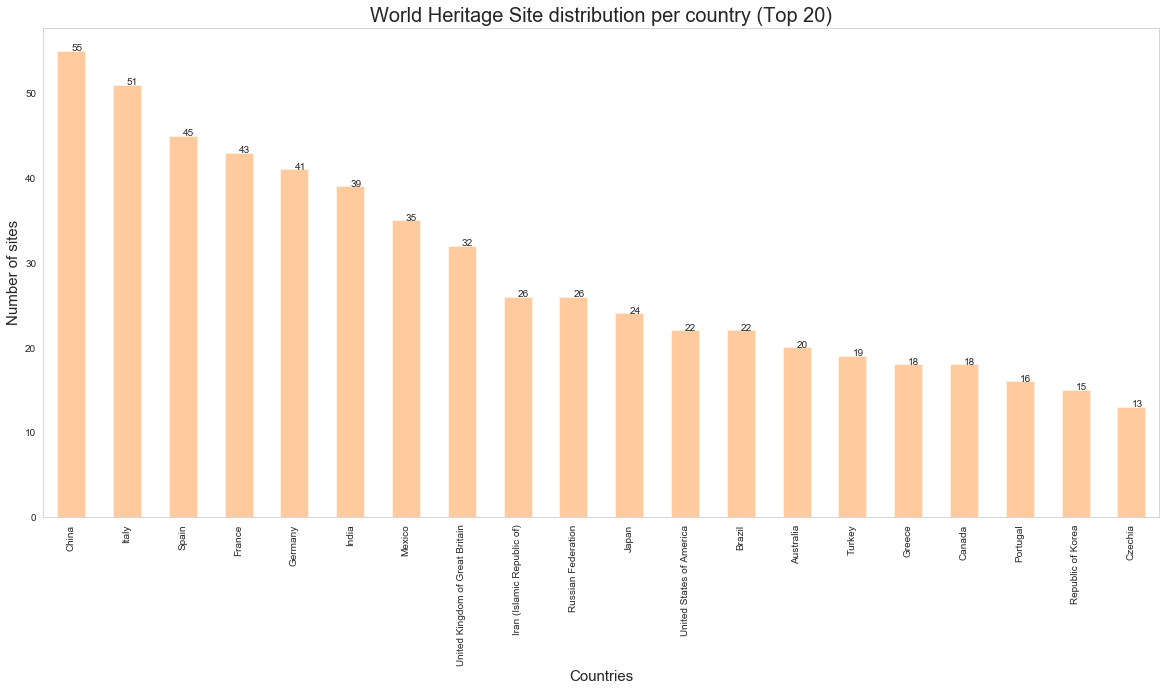

In [100]:
plt.figure(figsize=(20,9))
df["countries_short"].value_counts()[:20].plot(kind="bar", color="C1", alpha=0.4, grid=False)
  
for index, value in enumerate(df["countries_short"].value_counts()[:20]):
    plt.text(index, value, str(value))
plt.xlabel("Countries", fontsize=15)
plt.ylabel("Number of sites", fontsize=15)
plt.title("World Heritage Site distribution per country (Top 20)", fontsize=20)
plt.show()

## Heritage Sites by Category

In [131]:
df2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]))
df2.crs = {"init": "epsg:4326"}
wmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [119]:
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 12 columns):
Name                 1155 non-null object
Country name         1155 non-null object
latitude             1155 non-null float64
longitude            1155 non-null float64
date_inscribed       1155 non-null int64
danger               1155 non-null int64
category_long        1155 non-null object
short_description    1155 non-null object
area_hectares        1135 non-null float64
countries            1155 non-null object
countries_short      1155 non-null object
geometry             1155 non-null geometry
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 108.4+ KB


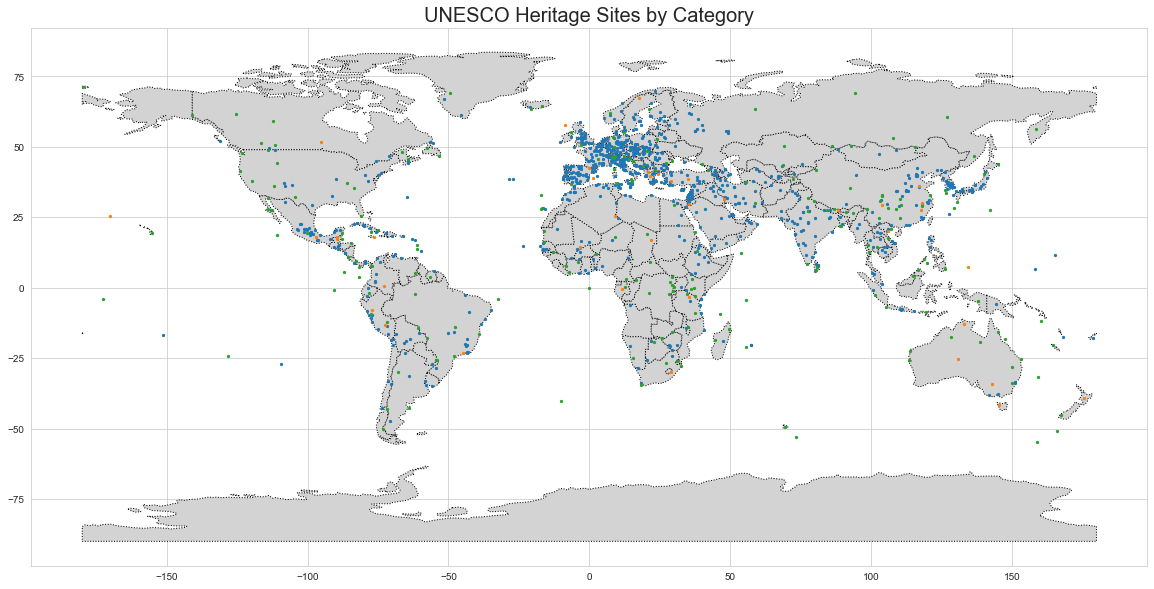

In [158]:
ax = wmap.plot(figsize=(20,20),linestyle=":",edgecolor="black",color="lightgray")
df2.groupby("category_long")["geometry"].plot(ax=ax,marker=".", markersize=20, alpha=1)
plt.title("UNESCO Heritage Sites by Category", fontsize=20)
plt.show()

### Legend

**Green:** Natural

**Blue:** Cultural

**Orange:** Mixed

## Threatened sites

In [111]:
df["danger"].value_counts()

0    1103
1      52
Name: danger, dtype: int64

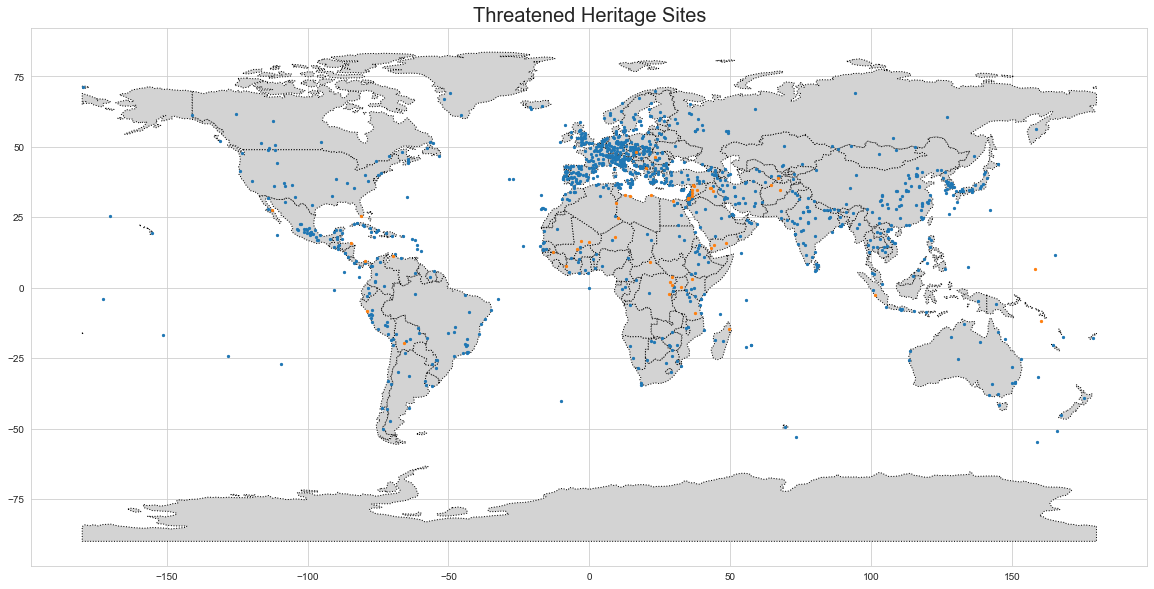

In [160]:
ax = wmap.plot(figsize=(20,20),linestyle=":",edgecolor="black",color="lightgray")
df2.groupby("danger")["geometry"].plot(ax=ax,marker=".", markersize=20, alpha=1)
plt.title("Threatened Heritage Sites", fontsize=20)
plt.show()

### Legend

**Blue:** Safe

**Orange:** Endangered